In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics

In [2]:
df = pd.read_csv("fetal_health.csv")

In [3]:
df.shape

(2126, 22)

In [4]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fetal_health', ylabel='count'>

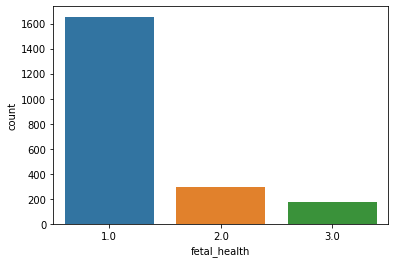

In [5]:
sns.countplot(df["fetal_health"])

In [6]:
x = df.drop(["fetal_health"], axis = 1)
y = df["fetal_health"]

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_scaled, y_train)

print(model.score(x_train_scaled, y_train))

0.9038978494623656


In [10]:
y_pred = model.predict(x_test_scaled)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_pred, y_test))
print(metrics.classification_report(y_pred, y_test))

0.8824451410658307
[[466  25   3]
 [ 25  63   4]
 [  5  13  34]]
              precision    recall  f1-score   support

         1.0       0.94      0.94      0.94       494
         2.0       0.62      0.68      0.65        92
         3.0       0.83      0.65      0.73        52

    accuracy                           0.88       638
   macro avg       0.80      0.76      0.78       638
weighted avg       0.88      0.88      0.88       638



In [11]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train_scaled, y_train)

print(model.score(x_train_scaled, y_train))

0.9274193548387096


In [12]:
y_pred = model.predict(x_test_scaled)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_pred, y_test))
print(metrics.classification_report(y_pred, y_test))

0.9184952978056427
[[479  23   4]
 [ 15  75   5]
 [  2   3  32]]
              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       506
         2.0       0.74      0.79      0.77        95
         3.0       0.78      0.86      0.82        37

    accuracy                           0.92       638
   macro avg       0.83      0.87      0.85       638
weighted avg       0.92      0.92      0.92       638



In [13]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    "kernel":["rbf","poly","sigmoid"],
    "C":[0.1,1,10,100],
    "gamma":[0.001,0.01,0.1,1],
    "degree":[1,2,3]
}

gs = GridSearchCV(
    SVC(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_params_)

0.9227150537634409
{'C': 100, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [14]:
model = SVC(C = 100, degree = 1, gamma = 0.1, kernel = "rbf")
model.fit(x_train_scaled, y_train)

print(model.score(x_train_scaled, y_train))

y_pred = model.predict(x_test_scaled)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_pred, y_test))
print(metrics.classification_report(y_pred, y_test))

0.9979838709677419
0.9153605015673981
[[472  22   2]
 [ 22  76   3]
 [  2   3  36]]
              precision    recall  f1-score   support

         1.0       0.95      0.95      0.95       496
         2.0       0.75      0.75      0.75       101
         3.0       0.88      0.88      0.88        41

    accuracy                           0.92       638
   macro avg       0.86      0.86      0.86       638
weighted avg       0.92      0.92      0.92       638



In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train_scaled, y_train)

print(model.score(x_train_scaled, y_train))

y_pred = model.predict(x_test_scaled)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_pred, y_test))
print(metrics.classification_report(y_pred, y_test))

1.0
0.945141065830721
[[486  19   2]
 [  8  79   1]
 [  2   3  38]]
              precision    recall  f1-score   support

         1.0       0.98      0.96      0.97       507
         2.0       0.78      0.90      0.84        88
         3.0       0.93      0.88      0.90        43

    accuracy                           0.95       638
   macro avg       0.90      0.91      0.90       638
weighted avg       0.95      0.95      0.95       638



In [17]:
from sklearn.model_selection import RandomizedSearchCV

grid_params = {
    "n_estimators":[100,150,200,250,300,350,400,600],
    "max_features":["auto","sqrt"],
    "max_depth":[4,8,12,16],
    "criterion":["gini","entropy"]
}

gs = RandomizedSearchCV(
    RandomForestClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_params_)

0.935483870967742
{'n_estimators': 150, 'max_features': 'sqrt', 'max_depth': 16, 'criterion': 'entropy'}


In [18]:
model = RandomForestClassifier(n_estimators = 150, max_features = "sqrt", max_depth = 16, criterion = "entropy")
model.fit(x_train_scaled, y_train)

print(model.score(x_train_scaled, y_train))

y_pred = model.predict(x_test_scaled)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_pred, y_test))
print(metrics.classification_report(y_pred, y_test))

1.0
0.9435736677115988
[[487  21   2]
 [  7  77   1]
 [  2   3  38]]
              precision    recall  f1-score   support

         1.0       0.98      0.95      0.97       510
         2.0       0.76      0.91      0.83        85
         3.0       0.93      0.88      0.90        43

    accuracy                           0.94       638
   macro avg       0.89      0.91      0.90       638
weighted avg       0.95      0.94      0.95       638



In [19]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(x_train_scaled, y_train)

print(model.score(x_train_scaled, y_train))

y_pred = model.predict(x_test_scaled)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_pred, y_test))
print(metrics.classification_report(y_pred, y_test))

0.9952956989247311
0.9529780564263323
[[483  15   2]
 [ 11  86   0]
 [  2   0  39]]
              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97       500
         2.0       0.85      0.89      0.87        97
         3.0       0.95      0.95      0.95        41

    accuracy                           0.95       638
   macro avg       0.93      0.93      0.93       638
weighted avg       0.95      0.95      0.95       638



In [22]:
grid_params = {
    "criterion":["mse","friedman_mse"],
    "learning_rate":[0.05,0.1,0.15,0.2],
    "max_depth":[2,3,4,5],
    "max_features":['sqrt', None],
    "max_leaf_nodes":list(range(2,10)),
    "n_estimators":list(range(50,500,50))
}

gs = RandomizedSearchCV(
    GradientBoostingClassifier(),
    grid_params,
    cv = 3
)

gs_results = gs.fit(x_train_scaled, y_train)

print(gs_results.best_score_)
print(gs_results.best_params_)

0.9415322580645161
{'n_estimators': 150, 'max_leaf_nodes': 5, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.15, 'criterion': 'mse'}


In [24]:
model = GradientBoostingClassifier(n_estimators = 150, max_leaf_nodes = 5, max_features = "sqrt", max_depth = 4, learning_rate = 0.15, criterion = "mse")
model.fit(x_train_scaled, y_train)

print(model.score(x_train_scaled, y_train))

y_pred = model.predict(x_test_scaled)

print(metrics.accuracy_score(y_test, y_pred))
print(metrics.confusion_matrix(y_pred, y_test))
print(metrics.classification_report(y_pred, y_test))

0.9973118279569892
0.9545454545454546
[[484  14   2]
 [  9  86   0]
 [  3   1  39]]
              precision    recall  f1-score   support

         1.0       0.98      0.97      0.97       500
         2.0       0.85      0.91      0.88        95
         3.0       0.95      0.91      0.93        43

    accuracy                           0.95       638
   macro avg       0.93      0.93      0.93       638
weighted avg       0.96      0.95      0.95       638

